# <font color = 'purple'> Predicting Titanic Survivors by Machine Learning
    
use machine learning to create a model that predicts which passengers survived the Titanic shipwreck

We are going to take the following approach:

1. Problem Definition
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## <font color='green'> 1. Problem definition
    
In a statement

>Given demographic data about each passengers, can we predict whether or not they have survived the shipreck?

## <font color ='green'> 2. Data

>This data is originally a competition on Kaggle.

## <font color = 'green'> 3. Evaluation
    
> Accuracy score is the percentage of passengers you correctly predict. If we can reach 95% accuracy at predicting whether or not a passenger has survived.

## <font color = 'green'> 4. Features
    
Information about each section of data

**Create data dictionary**
* survival: Survival	0 = No, 1 = Yes
* pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex:	Sex	
* Age:	Age in years	
* sibsp:	# of siblings / spouses aboard the Titanic	
* parch: 	# of parents / children aboard the Titanic	
* ticket:	Ticket number	
* fare:	Passenger fare	
* cabin:	Cabin number	
* embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
* pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower
* sibsp: The dataset defines family relations in this way...

    Sibling = brother, sister, stepbrother, stepsister
    
    Spouse = husband, wife (mistresses and fiancés were ignored)
    
* parch: The dataset defines family relations in this way...

    Parent = mother, father
    
    Child = daughter, son, stepdaughter, stepson
    
    Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# Prepare the tools

# Regular EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import models from SkLearn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## <font color = 'green'>Data

In [2]:
# load data
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
len(df)

891

## Data exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset

1. What questions are you trying to solve?
2. What kind of data we have and how can we treat different types?
3. What's missing from the data and how you deal with it?
4. Where are the outliers? Should we care about it?
5. How can you add, change or remove features to get more out of data?

**a. How many classifications do we have?**

In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

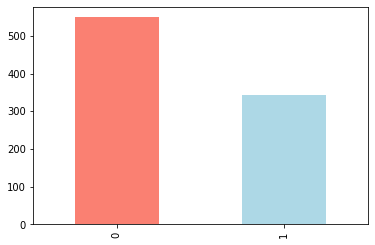

In [5]:
df['Survived'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])

**b. Let's see what type of data we have**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**c. Missing data**

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<font color = 'red'> Cabin has too many missing values, we will drop this feature to avoid confusion

**d. Understand more**

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Survival by Departure**

In [9]:
result = pd.crosstab(df.Survived, df.Embarked)
result

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

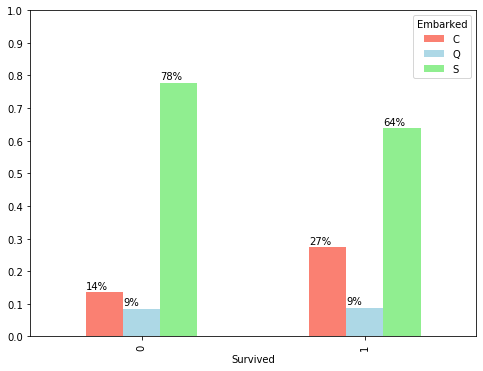

In [11]:
# Too hard to see, let's plot
ax = (result.div(result.sum(1), axis=0)).plot(kind = 'bar',
                                          color = ['salmon', 'lightblue', 'lightgreen'],
                                             figsize = (8,6))
plt.xticks(fontsize = 10)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
plt.yticks(ticks = np.arange(0,1.1,0.1))

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

In [12]:
result.div(result.sum(0), axis = 1)

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


Interestingly, people who embarked at Cherbourg has a higher number of survivor compared to dead. This is not true for the other departures points

**Survival by Class**

In [13]:
sur_class = pd.crosstab(df.Survived, df.Pclass)
sur_class

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [14]:
sur_class.div(sur_class.sum(0), axis = 1)

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


As expected, people from first class has a much better chance of surviving compared to third class. 63% first class survived while only 24% of third class made it.

**Survival by number of parents / children aboard the Titanic**

In [15]:
sur_parch = pd.crosstab(df.Survived, df.Parch)
sur_parch

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


<font color = 'red'> we may think of outliers in this case but we'll keep this for now

**Correlation Matrix**

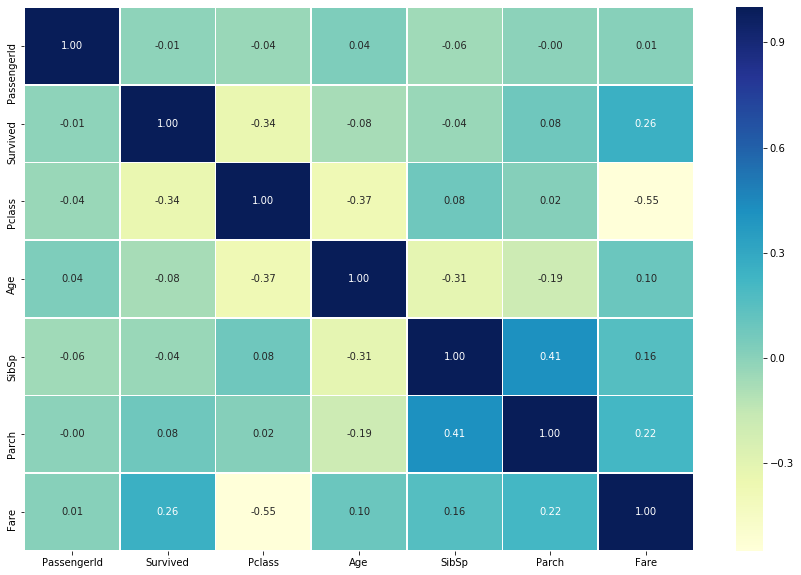

In [16]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = '.2f',
                cmap = 'YlGnBu');

<font color = 'purple'> SibSp and Parch seem to be relate and to avoid multicolinearity, we can remove one of them from being features in the model.
    
<font color = 'red'> Also, Ticket feature is not gonna affect the survival rate, so we'll drop it from the features
    

## <font color = 'green'> Features
    
    Let's turn string features into categorical features
    Let's fill in the missing values here for Age and Embarked

**Make a copy of dataframe to mess with**

In [17]:
df_tmp = df.copy()
df_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### <font color = 'blue'> 3.a. Turn string features into categorical features

In [19]:
# Find all the columns with string values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Sex
Embarked


In [45]:
# Turn them into categorical values
def to_categorical(dataframe):
    '''
    Turn the values with string values into categorical
    '''
    for label, content in dataframe.items():
        if pd.api.types.is_string_dtype(content):
            dataframe[label] = content.astype('category').cat.as_ordered()
            dataframe['coded_'+label] = dataframe[label].cat.codes

In [51]:
to_categorical(df_tmp)
df_tmp.coded_Sex.head()

0    1
1    0
2    0
3    0
4    1
Name: coded_Sex, dtype: int8

In [52]:
df_tmp.coded_Embarked.value_counts()

 2    644
 0    168
 1     77
-1      2
Name: coded_Embarked, dtype: int64

In [53]:
df_tmp.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name              category
Sex               category
Age                float64
SibSp                int64
Parch                int64
Ticket            category
Fare               float64
Cabin             category
Embarked          category
coded_Name           int16
coded_Sex             int8
coded_Ticket         int16
coded_Cabin          int16
coded_Embarked        int8
dtype: object

**Split data first to avoid leakage**

In [56]:
np.random.seed(26)
# Split the dataframe into X and y
X = df_tmp.drop(['Survived', 'Cabin', 'Ticket', 'Name','Sex','Embarked','coded_Name', 'coded_Ticket','coded_Cabin'], 
                axis = 1) # May consider drop SibSp or Parch later
y = df_tmp['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size  = 0.2)
X_train.shape, X_valid.shape

((712, 8), (179, 8))

### <font color = 'blue'> 3.b. Fill Missing Numeric Value for Age

In [57]:
df_tmp[df_tmp['Age'].isnull() & df.Parch != 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,coded_Name,coded_Sex,coded_Ticket,coded_Cabin,coded_Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,560,1,189,-1,0
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,653,0,196,138,0
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,157,0,28,123,2
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,464,1,488,-1,2
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,467,0,488,-1,2
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,465,0,488,-1,2
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,466,0,488,-1,2
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,561,1,189,-1,0


In [58]:
X_valid["Age"].mean(), X_valid["Age"].median()

(30.21964285714286, 29.0)

In [59]:
def fill_na_num(label):
    '''
    Fill missing values with median
    '''
    label.fillna(label.median(), inplace = True)

In [60]:
fill_na_num(X_train['Age'])
fill_na_num(X_valid['Age'])

/Users/PhuongMPham/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### <font color = 'blue'> 3.c. Fill Missing Categorical Value for Embarked

In [62]:
# Let's fill missing data
X_train['coded_Embarked'] = pd.Categorical(X_train['coded_Embarked']).codes + 1
X_valid['coded_Embarked'] = pd.Categorical(X_valid['coded_Embarked']).codes + 1
## Codes for missing values is -1 which we do not want, so we add 1 to make it 0.

/Users/PhuongMPham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/PhuongMPham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
unique, counts = np.unique(pd.Categorical(X_train['coded_Embarked']).codes, return_counts=True)
dict(zip(unique, counts))

{0: 2, 1: 137, 2: 63, 3: 510}

In [64]:
X_train.isna().sum()

PassengerId       0
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
coded_Sex         0
coded_Embarked    0
dtype: int64

In [65]:
X_valid.isna().sum()

PassengerId       0
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
coded_Sex         0
coded_Embarked    0
dtype: int64

In [66]:
y_train.isna().sum()

0

In [67]:
y_valid.isna().sum()

0

### <font color = 'brown'><center> Now that our data is all numeric and does not contain any missing values. Let's start the baseline model

## <font color = 'green'> Model

We'll train and find patterns on training sets and test it on the test set

Refer to the scikit ML map to know which models we should use:

    * Linear SVC
    * Logistic Regression
    * K-nearest Neighbors Classifier
    * Random Forest Classifier

In [68]:
# Let's put all models in a dictionary
models = {'Linear SVC': LinearSVC(),
         'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Create a function to run all types of model 
def fit_n_score(models, X_train, X_valid, y_train, y_valid):
    '''
    Fits and Evaluate given Machine Learning Model
    models: dict of different Scikit Learn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training label
    y_test: testing label
    '''
    # Set a random seed
    np.random.seed(26)
    # Create a model score empty dictionary
    score = {}
    # Fit and score each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        score[name] = model.score(X_valid, y_valid)
    # Return the result dict
    return score

In [69]:
result = fit_n_score(models, X_train, X_valid, y_train, y_valid)
result

/Users/PhuongMPham/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/PhuongMPham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Linear SVC': 0.7150837988826816,
 'Logistic Regression': 0.7821229050279329,
 'KNN': 0.6033519553072626,
 'Random Forest': 0.8044692737430168}

### <font color = 'blue'> **Model Comparison

In [73]:
model_compare = pd.DataFrame(result, index = ['accuracy'])
model_compare

,Linear SVC,Logistic Regression,KNN,Random Forest
accuracy,0.715084,0.782123,0.603352,0.804469


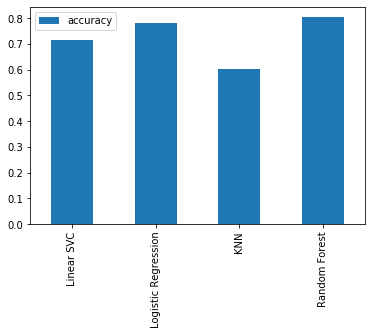

In [75]:
model_compare.T.plot.bar()

**Random Forest gave the best result. Let's tune `hyperparameters` to achieve a better accuracy**

## <font color  = 'green'> Experiments
    


Let's look at the following:

    * HYPERPARAMETERS tuning
    * Feature importance
    * Confusion Matrix
    * Cross-validation
    * Precision
    * Recall
    * F1 score
    * Classification Report
    * ROC curve
    * Area under the curve (AUC)

### <font color  = 'blue'> A. RandomizedSearchCV tune `Randomized Forest` and `Logistic Regression`
    
   #### A1. Create a hypermeter grid for each model

In [88]:
# Hypermeter grid for Logistic Regression
log_reg_grid = {'C': [100, 10, 1.0, 0.1, 0.01],
                'penalty' : ['l2'],
               'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Hypermeter grid for Randomized Forest
rf_grid = {'n_estimators': np.arange(10,1000, 50),
            'max_features': ['sqrt', 'log2'],
            'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2,20,2),
            'min_samples_leaf': np.arange(1,20,2)}

#### A2. Tune for Logistic Regression

In [79]:
# Use randomized Search to find the best hyperparameters combo
np.random.seed(26)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                verbose = True)
# Fit random hyperparameters for tuning
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/PhuongMPham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/PhuongMPham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentati

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.9s finished


RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   verbose=True)

In [80]:
# The best params
rs_log_reg.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}

In [81]:
rs_log_reg.score(X_valid, y_valid)

0.8044692737430168

**<font color = 'purple'>`Logistic Regression`: 80.45% accuracy**

#### A3. Tune for Random Forest 

In [89]:
np.random.seed(26)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          verbose = True)
# Fit random hyperparameters
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   35.6s finished


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [90]:
# The best hyperparameters are
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [116]:
rs_rf.score(X_valid, y_valid)

0.8156424581005587

**<font color = 'purple'> `Random Forest`: 81.56% Accuracy**

### <font color = 'brown'><center>Our final model is Random Forest

### <font color  = 'blue'> B. Classification report

In [122]:
model = RandomForestClassifier(n_estimators= 260,
                             min_samples_split = 6,
                             min_samples_leaf = 1,
                             max_features = 'sqrt',
                             max_depth = 5)
model.fit(X_train, y_train)
y_preds = model.predict(X_valid)

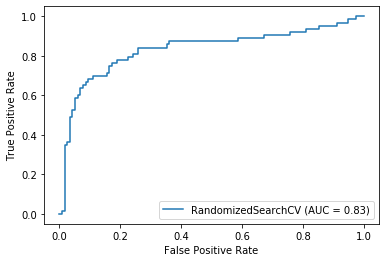

In [123]:
plot_roc_curve(rs_rf, X_valid, y_valid)

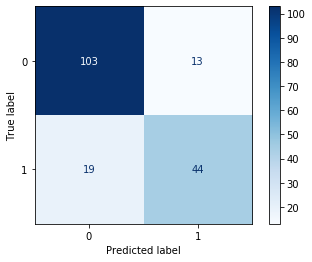

In [139]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_valid, y_valid,
                      cmap=plt.cm.Blues)

In [124]:
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       116
           1       0.77      0.70      0.73        63

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [126]:
# Cross-validated accuracy
acc = cross_val_score(model,
                     X_train,
                     y_train,
                     cv = 5,
                     scoring = 'accuracy')
acc.mean()

0.8174332709543977

In [127]:
# Cross-validated recall
recall = cross_val_score(model,
                     X_train,
                     y_train,
                     cv = 5,
                     scoring = 'recall')
recall.mean()

0.6881818181818182

In [129]:
# Cross-validated precision
precision= cross_val_score(model,
                     X_train,
                     y_train,
                     cv = 5,
                     scoring = 'precision')
precision.mean()

0.8399787291069076

In [130]:
# Cross-validated f1
f1 = cross_val_score(model,
                     X_train,
                     y_train,
                     cv = 5,
                     scoring = 'f1')
f1.mean()

0.7548639398354141

In [133]:
# Summarize all metrics
metrics = pd.DataFrame({'Accuracy': acc.mean(),
                       'Precision': precision.mean(),
                        'Recall': recall.mean(),
                       'F1': f1.mean()},
                      index = ['Score'])
metrics

,Accuracy,Precision,Recall,F1
Score,0.817433,0.839979,0.840829,0.754864


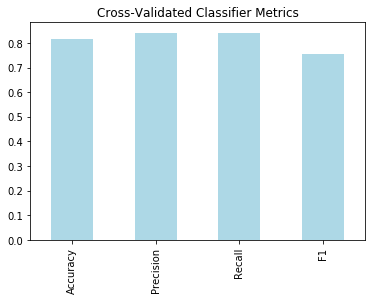

In [136]:
# Visualize it
metrics.T.plot(kind = 'bar', color = 'lightblue', title ='Cross-Validated Classifier Metrics', legend = None)

### <font color = 'green'> Load test set

In [96]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Explore Test Set data**

In [99]:
len(test_df)

418

In [100]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Check for columns with string values**

In [101]:
# Find columns with string values
for col, name in test_df.items():
    if pd.api.types.is_string_dtype(name):
        print(col)

Name
Sex
Ticket
Cabin
Embarked


In [103]:
# Convert columns into categorical values
to_categorical(test_df)
test_df.coded_Sex.head()

0    1
1    0
2    1
3    1
4    0
Name: coded_Sex, dtype: int8

In [105]:
test_df.coded_Embarked.value_counts()

2    270
0    102
1     46
Name: coded_Embarked, dtype: int64

**Check for missing values**

In [98]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [111]:
fill_na_num(test_df.Age)
fill_na_num(test_df.Fare)
test_df.isna().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             327
Embarked            0
coded_Name          0
coded_Sex           0
coded_Ticket        0
coded_Cabin         0
coded_Embarked      0
dtype: int64

In [113]:
np.random.seed(26)
# Split the dataframe into X and y
X_test = test_df.drop(['Cabin', 'Ticket', 'Name','Sex','Embarked','coded_Name', 'coded_Ticket','coded_Cabin'], 
                axis = 1) # May consider drop SibSp or Parch later

X_test.shape

(418, 8)

In [114]:
X_test.isna().sum()

PassengerId       0
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
coded_Sex         0
coded_Embarked    0
dtype: int64

### <font color = 'green'> Predict Survival

In [138]:
result = model.predict(X_test)
result[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [141]:
submission = pd.DataFrame(columns = ['PassengerId', 'Survived'])
submission

,PassengerId,Survived


In [144]:
submission['PassengerId'] = X_test['PassengerId']
submission['Survived'] = result
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [145]:
submission.shape

(418, 2)

**Export Result to CSV**

In [147]:
submission.to_csv('prediction.csv', index = False)